<center><h1>Data Bootcamp Final Project: Fall 2017</h1>

<h2>The Link Between Refugee Immigration

and Socioeconomic Indicators</h2>

<h3>Mia Averianova and Michael Ttappous</h3> </center>


# Introduction

***Research question***: *What countries are most involved with refugee crisis? How are host countries affected by the refugee flee?*

This project will look at refugee data from 1990 up to 2016 and will analyze the countries that have experience the biggest refugee flee and the countries that have taken in the greatest number of refugees. We will use datasets from WorldBank, the UN Refugee Agency and other sources to gather and filter the data on annual refugee movement rates.

The main point of the analysis is to look at the economic conditions of host countries before and after they open their borders to refugees. As such, we will compare two determinants of economic well being of host countries: 

a) *changes in crime rates in host countries using a crime index (and safety index where applicable for more detailed comparison)*;

b) *changes in GDP* and *unemployment*. We will take a look at a couple of articles on CNN and npr.org in order to better contextualize the data and connect it to recent news. In addition and in order to support or reject our claims about the impacts that refugees have on their host countries, we will look at demographics and standards of living in countries that take in the greatest number of refugees.

We seek to accomplish this analysis by splitting it into 3 parts.

* Part 1 will address the background of the question and the data sets that will be used for analysis.
* Part 2 will clean multiple datasets and manipulate them to address the question.
* Part 3 will visualize the data and provide concluding remarks based on numerical and graphical representations of the analysis.

We will begin first by importing the necessary packages with which to begin our investigation:

In [50]:
%matplotlib inline

# Import packages in order to bring in, manipulate, and visualize data:

import sys
import pandas as pd
import pandas_datareader as pdread
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt

# Print versions and date:

%matplotlib inline             
print('Python Version: ', sys.version)
print('Pandas Version: ', pd.__version__)
print("Today's Date: ", dt.date.today())

Python Version:  3.6.1 |Anaconda custom (64-bit)| (default, May 11 2017, 13:25:24) [MSC v.1900 64 bit (AMD64)]
Pandas Version:  0.20.1
Today's Date:  2017-12-02


# <center> Part 1</center>

As discussed in the introduction, this project will consider refugee data for a selected number of countries that experience the biggest refugee flee and countries that, in recent years, opened their borders to the greatest number of refugees.

In order to answer our research question, we will look at some articles that talk about the refugee statistics. We outlined the articles that give us updated information about the topic in question:

* *[Countries Hosting The Largest Numbers Of Refugees In The World](http://www.worldatlas.com/articles/countries-hosting-the-largest-number-of-refugees-in-the-world.html)* by World Atlas
* *[Turkey, Pakistan, Lebanon Host the Highest Number of Refugees](https://www.bloomberg.com/graphics/2017-countries-of-asylum-for-migrants/)* by Bloomberg
* *[Social and economic impact of large refugee populations on host developing countries](http://www.unhcr.org/en-us/excom/standcom/3ae68d0e10/social-economic-impact-large-refugee-populations-host-developing-countries.html)* by UNHCR
* *[Refugees Can Offer Economic Boost to Their Host Countries](https://www.ucdavis.edu/news/refugees-can-offer-economic-boost-their-host-countries/)* by UCDavis
* *[The Economic Effect of Refugee Crises on Host Countries and Implications for the Lebanese Case](http://repository.upenn.edu/cgi/viewcontent.cgi?article=1022&context=joseph_wharton_scholars)* by UPenn

The articles mentioned above outline some basic information neccesary for the analysis of our data. Some articles include statistics that have helped us determine how to clean the data and emphasize the countries more relevant to our analysis.

The next step was to find the datasets we can use to answer our research question. Our chosen datasets are as follows:

* [Data on refugee population by country of origin](https://data.worldbank.org/indicator/SM.POP.REFG.OR?view=chart).
* [Data on refugee population by country of asylum](http://popstats.unhcr.org/en/resettlement)
* [Unemployment rate](https://data.worldbank.org/indicator/SL.UEM.TOTL.ZS) (all countries)
* [GDP growth](https://data.worldbank.org/indicator/NY.GDP.MKTP.KD.ZG) (all countries)


* [Intentional homicide rate](http://data.un.org/Data.aspx?d=UNODC&f=tableCode%3a1)
* [Robbery rate by country](http://www.theglobaleconomy.com/rankings/robery/)
* [Global peace index](https://countryeconomy.com/demography/global-peace-index)

Important information to note:
* Our timeframe has been set as 1990-2016 as there is enough data after cleaning the relevant datasets to perform more informative analysis on this period.
* We will look at intentional homicide (is defined as unlawful death purposefully inflicted on a person by another person) as our crime index in order to eliminate milder crimes from our comparison (avoid double counting robbery rates)
* Unfortunately, we did not find enough data on the safety index for our countries of interest. Therefore, we will use a global peace index as one of the determinants instead

# <center> Part Two</center>

## Section 1: Countries and the Number of Refugees they Create

In this section, we start by importing a dataset from the World Bank, available [here](https://data.worldbank.org/indicator/SM.POP.REFG.OR?view=chart).

This data tells us the number of people that have fled each country as refugees, with data available from 1990 onwards.

In [51]:
url = 'https://raw.githubusercontent.com/MichaelTtappous/Final_Project/master/Refugee_numbers.csv'

ref = pd.read_csv(url,              # We read the csv file and assign it to ref (for refugees)
                  skiprows=4,       # Skip the first 4 rows, which contain irrelevant data.
                  index_col=0)      # set the index as the first column, which are the country names

In [52]:
print(ref.shape) # This tells us just how many rows and columns of data there are 

(264, 62)


In [53]:
ref.head(5) # Here we look at the top fifteen entrees in the dataset

,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
Country Name,,,,,,,,,,,,,,,,,,,,,
Aruba,ABW,Refugee population by country or territory of ...,SM.POP.REFG.OR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,AFG,Refugee population by country or territory of ...,SM.POP.REFG.OR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2887123.0,3054709.0,2664436.0,2586152.0,2556502.0,2596270.0,2666305.0,2501410.0,NaN,NaN
Angola,AGO,Refugee population by country or territory of ...,SM.POP.REFG.OR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,141021.0,134858.0,128664.0,19258.0,10286.0,9484.0,11869.0,8363.0,NaN,NaN
Albania,ALB,Refugee population by country or territory of ...,SM.POP.REFG.OR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,15711.0,14772.0,13551.0,12568.0,10103.0,10158.0,10408.0,11050.0,NaN,NaN
Andorra,AND,Refugee population by country or territory of ...,SM.POP.REFG.OR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.0,6.0,6.0,7.0,5.0,7.0,5.0,NaN,NaN,NaN


The dataset includes columns that are not of interest to us in this paricular dataset. We can thus drop these to clean up our dataset. A quick glance at the data set will also show us that there are no values for refugee data before 1990. This means that we can clean up the data even further by dropping the years from 1960-1990.

In [54]:
useless_columns = ['Indicator Code', 'Indicator Name','Country Code', 'Unnamed: 62', '2017', # We have data missing in the 
                                                                                             # last two entrees
                    '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970',
                    '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980',
                    '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989']  # And here we drop 
                                                                                             # the unnecessary years

ref = ref.drop(useless_columns, axis = 1) # Here, we manipulate the data to drop some of the unnecessary columns.

In [55]:
ref.head(5) # We can see that those columns have now been removed and our data is much cleaner

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Country Name,,,,,,,,,,,,,,,,,,,,,
Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,6339095.0,6306301.0,4552153.0,3374576.0,2731169.0,2679133.0,2674236.0,2676674.0,2667115.0,2601691.0,...,3057661.0,2833128.0,2887123.0,3054709.0,2664436.0,2586152.0,2556502.0,2596270.0,2666305.0,2501410.0
Angola,407760.0,381636.0,300492.0,323831.0,282577.0,246657.0,249687.0,267696.0,319430.0,353478.0,...,186155.0,171393.0,141021.0,134858.0,128664.0,19258.0,10286.0,9484.0,11869.0,8363.0
Albania,1822.0,3540.0,4353.0,4744.0,5019.0,5803.0,5785.0,5379.0,5353.0,6288.0,...,15340.0,15006.0,15711.0,14772.0,13551.0,12568.0,10103.0,10158.0,10408.0,11050.0
Andorra,NaN,NaN,NaN,NaN,2.0,2.0,3.0,1.0,2.0,3.0,...,9.0,6.0,6.0,6.0,6.0,7.0,5.0,7.0,5.0,NaN


In [56]:
ref.shape # we have gotten rid of more than half of the columns in the dataset to make it more applicable to our question.

(264, 27)

In [57]:
ref = ref.transpose() # Here we transpose the dataset so that the index is set by year

ref.head(15)

Country Name,Aruba,Afghanistan,Angola,Albania,Andorra,Arab World,United Arab Emirates,Argentina,Armenia,American Samoa,...,Virgin Islands (U.S.),Vietnam,Vanuatu,World,Samoa,Kosovo,"Yemen, Rep.",South Africa,Zambia,Zimbabwe
1990,NaN,6339095.0,407760.0,1822.0,NaN,2212498.0,NaN,334.0,1.0,NaN,...,NaN,496029.0,NaN,19805688.0,NaN,NaN,8.0,14783.0,1.0,4.0
1991,NaN,6306301.0,381636.0,3540.0,NaN,2408680.0,NaN,198.0,1.0,NaN,...,NaN,498323.0,NaN,19414923.0,NaN,NaN,73.0,11206.0,1.0,128.0
1992,NaN,4552153.0,300492.0,4353.0,NaN,2614885.0,NaN,113.0,195003.0,NaN,...,NaN,517111.0,NaN,20023531.0,NaN,NaN,31.0,9241.0,1990.0,9.0
1993,NaN,3374576.0,323831.0,4744.0,NaN,1906599.0,NaN,98.0,200116.0,NaN,...,NaN,527627.0,NaN,18718993.0,NaN,NaN,39.0,9094.0,1574.0,17.0
1994,NaN,2731169.0,282577.0,5019.0,2.0,2001784.0,NaN,469.0,201842.0,NaN,...,NaN,539101.0,NaN,18325596.0,1.0,NaN,150.0,1514.0,16.0,42.0
1995,NaN,2679133.0,246657.0,5803.0,2.0,2005056.0,NaN,330.0,201442.0,NaN,...,NaN,543541.0,NaN,17418028.0,NaN,NaN,369.0,488.0,20.0,36.0
1996,NaN,2674236.0,249687.0,5785.0,3.0,2035564.0,NaN,217.0,203231.0,NaN,...,NaN,518340.0,NaN,16102005.0,NaN,NaN,1154.0,290.0,40.0,34.0
1997,NaN,2676674.0,267696.0,5379.0,1.0,1864336.0,4.0,159.0,203690.0,NaN,...,NaN,476795.0,NaN,14934398.0,1.0,NaN,1721.0,244.0,63.0,38.0
1998,NaN,2667115.0,319430.0,5353.0,2.0,1806135.0,7.0,142.0,193150.0,NaN,...,NaN,435437.0,NaN,14552205.0,1.0,NaN,1935.0,188.0,77.0,42.0
1999,NaN,2601691.0,353478.0,6288.0,3.0,1817001.0,7.0,586.0,193231.0,NaN,...,NaN,405377.0,NaN,14863846.0,1.0,NaN,2022.0,193.0,87.0,43.0


In [58]:
ref.index.name = 'Year' # Here we set the index name as the Year

ref.head(15)

Country Name,Aruba,Afghanistan,Angola,Albania,Andorra,Arab World,United Arab Emirates,Argentina,Armenia,American Samoa,...,Virgin Islands (U.S.),Vietnam,Vanuatu,World,Samoa,Kosovo,"Yemen, Rep.",South Africa,Zambia,Zimbabwe
Year,,,,,,,,,,,,,,,,,,,,,
1990,NaN,6339095.0,407760.0,1822.0,NaN,2212498.0,NaN,334.0,1.0,NaN,...,NaN,496029.0,NaN,19805688.0,NaN,NaN,8.0,14783.0,1.0,4.0
1991,NaN,6306301.0,381636.0,3540.0,NaN,2408680.0,NaN,198.0,1.0,NaN,...,NaN,498323.0,NaN,19414923.0,NaN,NaN,73.0,11206.0,1.0,128.0
1992,NaN,4552153.0,300492.0,4353.0,NaN,2614885.0,NaN,113.0,195003.0,NaN,...,NaN,517111.0,NaN,20023531.0,NaN,NaN,31.0,9241.0,1990.0,9.0
1993,NaN,3374576.0,323831.0,4744.0,NaN,1906599.0,NaN,98.0,200116.0,NaN,...,NaN,527627.0,NaN,18718993.0,NaN,NaN,39.0,9094.0,1574.0,17.0
1994,NaN,2731169.0,282577.0,5019.0,2.0,2001784.0,NaN,469.0,201842.0,NaN,...,NaN,539101.0,NaN,18325596.0,1.0,NaN,150.0,1514.0,16.0,42.0
1995,NaN,2679133.0,246657.0,5803.0,2.0,2005056.0,NaN,330.0,201442.0,NaN,...,NaN,543541.0,NaN,17418028.0,NaN,NaN,369.0,488.0,20.0,36.0
1996,NaN,2674236.0,249687.0,5785.0,3.0,2035564.0,NaN,217.0,203231.0,NaN,...,NaN,518340.0,NaN,16102005.0,NaN,NaN,1154.0,290.0,40.0,34.0
1997,NaN,2676674.0,267696.0,5379.0,1.0,1864336.0,4.0,159.0,203690.0,NaN,...,NaN,476795.0,NaN,14934398.0,1.0,NaN,1721.0,244.0,63.0,38.0
1998,NaN,2667115.0,319430.0,5353.0,2.0,1806135.0,7.0,142.0,193150.0,NaN,...,NaN,435437.0,NaN,14552205.0,1.0,NaN,1935.0,188.0,77.0,42.0


In [59]:
ref = ref.dropna(axis=1,how='all')

ref.head(15)

Country Name,Afghanistan,Angola,Albania,Andorra,Arab World,United Arab Emirates,Argentina,Armenia,Antigua and Barbuda,Australia,...,St. Vincent and the Grenadines,"Venezuela, RB",Vietnam,Vanuatu,World,Samoa,"Yemen, Rep.",South Africa,Zambia,Zimbabwe
Year,,,,,,,,,,,,,,,,,,,,,
1990,6339095.0,407760.0,1822.0,NaN,2212498.0,NaN,334.0,1.0,NaN,NaN,...,NaN,NaN,496029.0,NaN,19805688.0,NaN,8.0,14783.0,1.0,4.0
1991,6306301.0,381636.0,3540.0,NaN,2408680.0,NaN,198.0,1.0,NaN,NaN,...,NaN,1.0,498323.0,NaN,19414923.0,NaN,73.0,11206.0,1.0,128.0
1992,4552153.0,300492.0,4353.0,NaN,2614885.0,NaN,113.0,195003.0,NaN,NaN,...,NaN,4.0,517111.0,NaN,20023531.0,NaN,31.0,9241.0,1990.0,9.0
1993,3374576.0,323831.0,4744.0,NaN,1906599.0,NaN,98.0,200116.0,NaN,NaN,...,NaN,135.0,527627.0,NaN,18718993.0,NaN,39.0,9094.0,1574.0,17.0
1994,2731169.0,282577.0,5019.0,2.0,2001784.0,NaN,469.0,201842.0,NaN,2.0,...,7.0,371.0,539101.0,NaN,18325596.0,1.0,150.0,1514.0,16.0,42.0
1995,2679133.0,246657.0,5803.0,2.0,2005056.0,NaN,330.0,201442.0,NaN,1.0,...,7.0,476.0,543541.0,NaN,17418028.0,NaN,369.0,488.0,20.0,36.0
1996,2674236.0,249687.0,5785.0,3.0,2035564.0,NaN,217.0,203231.0,NaN,1.0,...,13.0,557.0,518340.0,NaN,16102005.0,NaN,1154.0,290.0,40.0,34.0
1997,2676674.0,267696.0,5379.0,1.0,1864336.0,4.0,159.0,203690.0,1.0,2.0,...,13.0,608.0,476795.0,NaN,14934398.0,1.0,1721.0,244.0,63.0,38.0
1998,2667115.0,319430.0,5353.0,2.0,1806135.0,7.0,142.0,193150.0,2.0,1.0,...,24.0,570.0,435437.0,NaN,14552205.0,1.0,1935.0,188.0,77.0,42.0


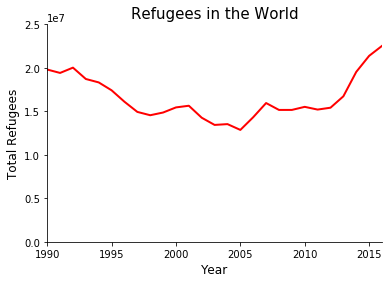

In [60]:
fig, ax = plt.subplots() # Here we create a figure and specify its settings below

ref['World'].plot(ax = ax, linewidth = 2, color = 'red')

ax.set_ylim(0, 25000000)
ax.set_title('Refugees in the World', fontsize = 15)

ax.set_ylabel('Total Refugees', fontsize = 12)
ax.set_xlabel('Year', fontsize = 12)
ax.spines["right"].set_visible(False) # This removes the ``spines'', just the right and top
ax.spines["top"].set_visible(False) # ones...

plt.show()

## <center>Section 2: Countries and the Number of Refugees they Host</center>

In this section, we bring in and analyze data from the UN Refugee Agency about *[Countries Hosting Refugees](http://popstats.unhcr.org/en/resettlement)*.

This dataset tells us about how many refugees were rellocated to certain countries from 1959-2016.

In [61]:
url2 = 'https://raw.githubusercontent.com/MichaelTtappous/Final_Project/master/Resettlement%20Numbers.csv'

ref2 = pd.read_csv(url2)            # We read the csv file and assign it to ref2 (for resettled refugees)
ref2.head(10)

,Country / territory of asylum/residence,Origin,Year,Value
0,Canada,Albania,1959,17
1,Canada,Austria,1959,17
2,Canada,Belgium,1959,2
3,Canada,Bulgaria,1959,35
4,Canada,China,1959,2
5,Canada,Czech Rep.,1959,36
6,Canada,Egypt,1959,5
7,Canada,Estonia,1959,31
8,Canada,Finland,1959,3
9,Canada,France,1959,1


In [62]:
ref2 = ref2.rename(columns={'Country / territory of asylum/residence':
                            'Country', 'Value': 'Refugees'})
# Rename the columns that we are going to use for clarfication

ref2.head()

,Country,Origin,Year,Refugees
0,Canada,Albania,1959,17
1,Canada,Austria,1959,17
2,Canada,Belgium,1959,2
3,Canada,Bulgaria,1959,35
4,Canada,China,1959,2


In [63]:
ref2 = ref2.drop('Origin', axis = 1) # We drop the origin country as this is not of interest
ref2.shape

(9075, 3)

In [64]:
ref2 = ref2[ref2.Refugees.apply(lambda x: x.isnumeric())]

# Drop all the rows that have a non-integer in the Refugees column (will help with manipulation)    

ref2.shape
ref2.dtypes

Country     object
Year         int64
Refugees    object
dtype: object

In [65]:
ref2 = ref2.convert_objects(convert_numeric=True)

# Here we convert the values in the Refugees column from object to integer

C:\Users\Mike\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


In [66]:
ref2.dtypes

# Check that Refugees is an int64 type

Country     object
Year         int64
Refugees     int64
dtype: object

In [67]:
ref2 = ref2.groupby(['Year', 'Country']).sum()

# Here, we group first by year so that we have one row per year and then 
# we group by country so that there is one observation per country.
# The number of refugees by country is also summed per country, per year.

ref2

,,Refugees
Year,Country,
1959,Canada,3047
1960,Canada,2329
1961,Canada,1813
1962,Canada,1733
1963,Canada,2024
1964,Canada,2279
1965,Canada,2131
1966,Canada,2058
1967,Canada,1499


In [68]:
ref2 = ref2.pivot_table(values='Refugees', index='Year', columns='Country')

# Here, we manipulate the data with a pivot table so that it matches the format
# of our Section 1 dataset and to allow us to represent the information graphically.

ref2.head(15)

Country,Argentina,Australia,Austria,Belarus,Belgium,Benin,Brazil,Burkina Faso,Burundi,Cambodia,...,Rep. of Korea,Romania,South Africa,Spain,Sweden,Switzerland,United Kingdom of Great Britain and Northern Ireland,United States of America,Uruguay,Yemen
Year,,,,,,,,,,,,,,,,,,,,,
1959,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1961,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1963,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1964,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1965,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1966,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1967,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [69]:
useless_rows = [1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
                1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 
                1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989]  
# As we care about making comparisons between the datasets, we can drop these years 
# and focus solely on the last 25 years of available data.

ref2 = ref2.drop(useless_rows, axis = 0) # We drop the assigned years
ref2

Country,Argentina,Australia,Austria,Belarus,Belgium,Benin,Brazil,Burkina Faso,Burundi,Cambodia,...,Rep. of Korea,Romania,South Africa,Spain,Sweden,Switzerland,United Kingdom of Great Britain and Northern Ireland,United States of America,Uruguay,Yemen
Year,,,,,,,,,,,,,,,,,,,,,
1990,NaN,11948.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1455.0,NaN,650.0,122276.0,NaN,NaN
1991,NaN,7745.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1732.0,NaN,490.0,112811.0,NaN,NaN
1992,NaN,9974.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3402.0,NaN,620.0,132032.0,NaN,NaN
1993,NaN,10930.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,937.0,NaN,510.0,119483.0,NaN,NaN
1994,NaN,13557.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,7431.0,NaN,260.0,112682.0,NaN,NaN
1995,NaN,15412.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1964.0,NaN,70.0,99490.0,NaN,NaN
1996,NaN,11100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1629.0,NaN,20.0,75693.0,NaN,NaN
1997,NaN,7816.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1180.0,NaN,NaN,70085.0,NaN,NaN
1998,NaN,12558.0,NaN,NaN,NaN,NaN,NaN,5.0,16.0,NaN,...,NaN,NaN,12.0,NaN,1130.0,NaN,NaN,76554.0,1.0,NaN


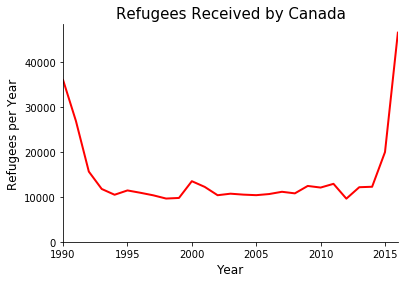

In [70]:
fig, ax = plt.subplots() # Here we create a figure and specify its settings below

ref2['Canada'].plot(ax = ax, linewidth = 2, color = 'red', legend = False)

ax.set_ylim(0)
ax.set_title('Refugees Received by Canada', fontsize = 15)

ax.set_ylabel('Refugees per Year', fontsize = 12)
ax.set_xlabel('Year', fontsize = 12)
ax.spines["right"].set_visible(False) # This removes the ``spines'', just the right and top
ax.spines["top"].set_visible(False) # ones...

plt.show()

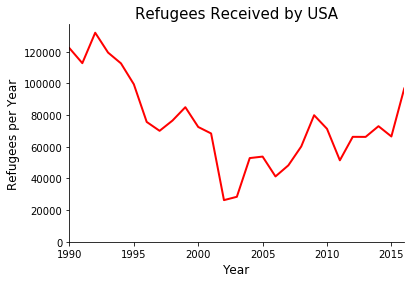

In [71]:
fig, ax = plt.subplots() # Here we create a figure and specify its settings below

ref2['United States of America'].plot(ax = ax, linewidth = 2, color = 'red', legend = False)

ax.set_ylim(0)
ax.set_title('Refugees Received by USA', fontsize = 15)

ax.set_ylabel('Refugees per Year', fontsize = 12)
ax.set_xlabel('Year', fontsize = 12)
ax.spines["right"].set_visible(False) # This removes the ``spines'', just the right and top
ax.spines["top"].set_visible(False) # ones...

plt.show()

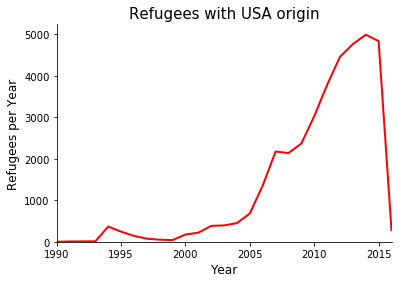

In [72]:
fig, ax = plt.subplots() # Here we create a figure and specify its settings below

ref['United States'].plot(ax = ax, linewidth = 2, color = 'red')

ax.set_ylim(0)
ax.set_title('Refugees with USA origin', fontsize = 15)

ax.set_ylabel('Refugees per Year', fontsize = 12)
ax.set_xlabel('Year', fontsize = 12)
ax.spines["right"].set_visible(False) # This removes the ``spines'', just the right and top
ax.spines["top"].set_visible(False) # ones...

plt.show()

## <center>Section 3: Countries and Unemployment Rates</center>


In [73]:
url3 = 'https://raw.githubusercontent.com/MichaelTtappous/Final_Project/master/Unemployment%20Rates.csv'

une = pd.read_csv(url3,              # We read the csv file and assign it to ref (for refugees)
                  skiprows=4,       # Skip the first 4 rows, which contain irrelevant data.
                  index_col=0)      # set the index as the first column, which are the country names

une.head()

,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
Country Name,,,,,,,,,,,,,,,,,,,,,
Aruba,ABW,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,AFG,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.238,8.228,8.200,8.180,8.357,8.449,8.516,8.540,8.624,NaN
Angola,AGO,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.773,6.787,6.792,6.807,6.828,6.804,6.671,6.579,6.596,NaN
Albania,ALB,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,13.760,14.200,13.977,13.438,15.640,17.490,17.080,16.333,15.800,NaN
Andorra,AND,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [74]:
une = une.drop(useless_columns, axis = 1) # Here, we manipulate the data to drop some of the unnecessary columns.
# We can use the same columns as defined before because the source is the same (World Bank)

une.head()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Country Name,,,,,,,,,,,,,,,,,,,,,
Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,NaN,1.207,1.062,1.388,1.351,0.602,1.138,1.137,1.132,1.138,...,8.342,8.278,8.238,8.228,8.200,8.180,8.357,8.449,8.516,8.540
Angola,NaN,6.731,6.658,6.467,6.768,6.939,6.925,6.852,6.824,6.798,...,7.029,6.914,6.773,6.787,6.792,6.807,6.828,6.804,6.671,6.579
Albania,NaN,13.210,14.236,15.565,15.351,14.711,14.405,13.455,14.230,14.536,...,13.500,13.000,13.760,14.200,13.977,13.438,15.640,17.490,17.080,16.333
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [75]:
une = une.transpose() # Here we transpose the dataset so that the index is set by year

une.head(15)

Country Name,Aruba,Afghanistan,Angola,Albania,Andorra,Arab World,United Arab Emirates,Argentina,Armenia,American Samoa,...,Virgin Islands (U.S.),Vietnam,Vanuatu,World,Samoa,Kosovo,"Yemen, Rep.",South Africa,Zambia,Zimbabwe
1990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991,NaN,1.207,6.731,13.210,NaN,12.681330,3.207,5.800000,18.987000,NaN,...,9.890,2.690,5.792,6.058860,2.100,NaN,10.587000,23.933001,18.900000,5.766
1992,NaN,1.062,6.658,14.236,NaN,12.987230,3.258,6.700000,18.054001,NaN,...,9.875,2.616,5.784,5.916364,3.410,NaN,12.960000,23.533001,19.329000,5.854
1993,NaN,1.388,6.467,15.565,NaN,13.594802,3.268,10.100000,18.628000,NaN,...,9.452,2.896,5.770,6.045846,2.445,NaN,15.820000,25.907000,19.700001,5.949
1994,NaN,1.351,6.768,15.351,NaN,13.791964,2.080,12.100000,17.795000,NaN,...,10.071,2.459,5.744,6.168265,5.655,NaN,8.340000,20.000000,18.565001,5.000
1995,NaN,0.602,6.939,14.711,NaN,14.634510,1.800,18.799999,17.959000,NaN,...,9.763,2.142,5.729,6.135627,5.448,NaN,15.084000,16.900000,17.431999,5.514
1996,NaN,1.138,6.925,14.405,NaN,14.159910,2.705,17.200001,18.166000,NaN,...,9.572,1.900,5.730,6.234118,4.956,NaN,16.122000,21.000000,15.000000,6.047
1997,NaN,1.137,6.852,13.455,NaN,13.706134,2.611,14.900000,16.733000,NaN,...,9.712,2.900,5.732,6.325994,9.101,NaN,16.409000,22.900000,13.523000,6.930
1998,NaN,1.132,6.824,14.230,NaN,13.465112,3.286,12.800000,17.341000,NaN,...,9.289,2.300,5.739,6.510969,8.993,NaN,13.194000,25.000000,12.000000,6.592
1999,NaN,1.138,6.798,14.536,NaN,12.312682,3.281,14.100000,16.893999,NaN,...,9.448,2.300,5.738,6.582962,8.882,NaN,11.500000,25.400000,12.477000,6.000


In [76]:
ref.index.name = 'Year' # Here we set the index name as the Year

une = une.dropna(axis=1,how='all')

une.head(15)

Country Name,Afghanistan,Angola,Albania,Arab World,United Arab Emirates,Argentina,Armenia,Australia,Austria,Azerbaijan,...,"Venezuela, RB",Virgin Islands (U.S.),Vietnam,Vanuatu,World,Samoa,"Yemen, Rep.",South Africa,Zambia,Zimbabwe
1990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991,1.207,6.731,13.210,12.681330,3.207,5.800000,18.987000,9.579,3.400,5.011,...,9.500000,9.890,2.690,5.792,6.058860,2.100,10.587000,23.933001,18.900000,5.766
1992,1.062,6.658,14.236,12.987230,3.258,6.700000,18.054001,10.729,3.600,4.957,...,7.700000,9.875,2.616,5.784,5.916364,3.410,12.960000,23.533001,19.329000,5.854
1993,1.388,6.467,15.565,13.594802,3.268,10.100000,18.628000,10.874,4.300,4.878,...,6.700000,9.452,2.896,5.770,6.045846,2.445,15.820000,25.907000,19.700001,5.949
1994,1.351,6.768,15.351,13.791964,2.080,12.100000,17.795000,9.719,3.535,4.764,...,8.600000,10.071,2.459,5.744,6.168265,5.655,8.340000,20.000000,18.565001,5.000
1995,0.602,6.939,14.711,14.634510,1.800,18.799999,17.959000,8.469,4.347,4.638,...,10.200000,9.763,2.142,5.729,6.135627,5.448,15.084000,16.900000,17.431999,5.514
1996,1.138,6.925,14.405,14.159910,2.705,17.200001,18.166000,8.506,5.281,4.518,...,12.400000,9.572,1.900,5.730,6.234118,4.956,16.122000,21.000000,15.000000,6.047
1997,1.137,6.852,13.455,13.706134,2.611,14.900000,16.733000,8.362,5.149,6.587,...,10.600000,9.712,2.900,5.732,6.325994,9.101,16.409000,22.900000,13.523000,6.930
1998,1.132,6.824,14.230,13.465112,3.286,12.800000,17.341000,7.676,5.523,7.233,...,11.000000,9.289,2.300,5.739,6.510969,8.993,13.194000,25.000000,12.000000,6.592
1999,1.138,6.798,14.536,12.312682,3.281,14.100000,16.893999,6.872,4.698,5.233,...,14.500000,9.448,2.300,5.738,6.582962,8.882,11.500000,25.400000,12.477000,6.000


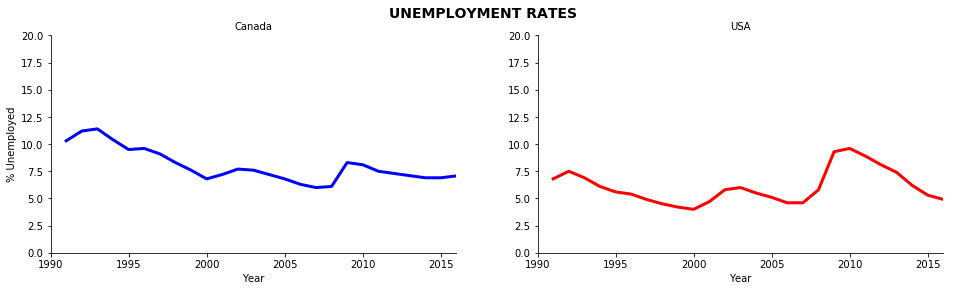

In [77]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, sharex = True, figsize = (16,4)) 


une['Canada'].plot(ax = ax[0], color = 'b', linewidth = 3.0) # Same idea, but specify that the first axes is for GDP
une['United States'].plot(ax = ax[1], color = 'r', linewidth = 3.0)

fig.suptitle("UNEMPLOYMENT RATES", fontsize = 14, fontweight = "bold")

ax[0].set_title("Canada", fontsize = 10) # This stuff sets the title for each of the subplots...
ax[1].set_title("USA", fontsize = 10)

# The command above we needed to do element by element, but lets automate some other things...

for var in ax: # Think through what this is doing, for every instance of ax called var we will
    
    var.set_ylim(0, 20)  # set the ylimits
    
    var.spines["right"].set_visible(False) # remove the top and right spines
    
    var.spines["top"].set_visible(False)
    
    var.set_xlabel("Year") # set the x label to year
    
   
ax[0].set_ylabel("% Unemployed") # Lable the y axis (only once since its the same for both)

plt.show()

## <center>Section 4: Countries and Annual GDP Growth Rates</center>

In [78]:
url4 = 'https://raw.githubusercontent.com/MichaelTtappous/Final_Project/master/GDP%20Growth%20Rates.csv'

gdp = pd.read_csv(url4,              # We read the csv file and assign it to ref (for refugees)
                  skiprows=4,       # Skip the first 4 rows, which contain irrelevant data.
                  index_col=0)      # set the index as the first column, which are the country names

gdp.head()

,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
Country Name,,,,,,,,,,,,,,,,,,,,,
Aruba,ABW,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-5.653502,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,AFG,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,21.020649,8.433290,6.113685,14.434741,1.959123,1.312531,1.112558,2.232272,NaN,NaN
Angola,AGO,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.412870,3.407655,3.918597,5.155441,6.813586,4.804473,3.006981,0.000000,NaN,NaN
Albania,ALB,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.350000,3.710000,2.550000,1.420000,1.110000,1.800000,2.590000,3.460000,NaN,NaN
Andorra,AND,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-3.817986,-5.347977,-4.802675,-1.760010,-0.063514,NaN,NaN,NaN,NaN,NaN


In [79]:
gdp = gdp.drop(useless_columns, axis = 1) # Here, we manipulate the data to drop some of the unnecessary columns.
# We can use the same columns as defined before because the source is the same (World Bank)

gdp.head()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Country Name,,,,,,,,,,,,,,,,,,,,,
Aruba,NaN,NaN,NaN,NaN,NaN,1.245086,7.814432,6.666622,1.154469,4.514062,...,-3.654626,-6.881302,-5.653502,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,13.740205,3.611368,21.020649,8.433290,6.113685,14.434741,1.959123,1.312531,1.112558,2.232272
Angola,-0.300000,-1.200000,-6.900000,-24.700000,3.500000,10.400000,11.200000,7.900000,6.804762,3.239800,...,22.593054,13.817146,2.412870,3.407655,3.918597,5.155441,6.813586,4.804473,3.006981,0.000000
Albania,-9.575640,-29.588998,-7.200000,9.600000,8.300000,13.300000,9.100000,-10.837856,9.008853,13.501173,...,5.900000,7.530000,3.350000,3.710000,2.550000,1.420000,1.110000,1.800000,2.590000,3.460000
Andorra,3.781388,2.546003,0.929212,-1.031484,2.383188,2.757499,4.649740,9.067672,3.194790,4.099081,...,0.078039,-8.594256,-3.817986,-5.347977,-4.802675,-1.760010,-0.063514,NaN,NaN,NaN


In [80]:
gdp = gdp.transpose() # Here we transpose the dataset so that the index is set by year

ref.index.name = 'Year' # Here we set the index name as the Year

gdp = gdp.dropna(axis=1,how='all')

gdp.head(15)

Country Name,Aruba,Afghanistan,Angola,Albania,Andorra,Arab World,United Arab Emirates,Argentina,Armenia,American Samoa,...,Virgin Islands (U.S.),Vietnam,Vanuatu,World,Samoa,Kosovo,"Yemen, Rep.",South Africa,Zambia,Zimbabwe
1990,NaN,NaN,-0.300000,-9.575640,3.781388,13.141355,18.327986,-2.398959,NaN,NaN,...,NaN,5.100918,11.706485,3.001995,-4.421451,NaN,NaN,-0.317786,-0.481072,6.988553
1991,NaN,NaN,-1.200000,-29.588998,2.546003,1.529616,0.860082,12.669710,-11.699998,NaN,...,NaN,5.960844,3.139322,1.420614,-2.300007,NaN,6.293494,-1.018281,-0.036133,5.531782
1992,NaN,NaN,-6.900000,-7.200000,0.929212,4.795395,3.344945,11.940775,-41.800003,NaN,...,NaN,8.646047,2.592017,1.778089,-0.199990,NaN,8.207598,-2.136996,-1.730922,-9.015570
1993,NaN,NaN,-24.700000,9.600000,-1.031484,3.200939,1.261191,5.906919,-8.799999,NaN,...,NaN,8.072731,0.750740,1.632122,4.099988,NaN,4.001966,1.233520,6.797274,1.051459
1994,NaN,NaN,3.500000,8.300000,2.383188,3.209842,6.896149,5.836201,5.400003,NaN,...,NaN,8.838981,9.056387,3.010035,-2.542096,NaN,6.721949,3.234143,-8.625442,9.235199
1995,1.245086,NaN,10.400000,13.300000,2.757499,2.755268,6.687886,-2.845210,6.899998,NaN,...,NaN,9.540480,1.011760,3.048582,6.673642,NaN,5.669371,3.115634,2.897669,0.158026
1996,7.814432,NaN,11.200000,9.100000,4.649740,4.478689,5.798404,5.526690,5.865401,NaN,...,NaN,9.340017,2.328455,3.384594,7.178966,NaN,4.634967,4.306728,6.218546,10.360697
1997,6.666622,NaN,7.900000,-10.837856,9.067672,4.187297,8.190399,8.111047,3.321080,NaN,...,NaN,8.152084,4.913240,3.669816,0.643425,NaN,5.231112,2.646829,3.814007,2.680594
1998,1.154469,NaN,6.804762,9.008853,3.194790,5.100198,0.291994,3.850179,7.300000,NaN,...,NaN,5.764455,4.301466,2.523994,2.194886,NaN,6.006695,0.517360,-0.385746,2.885212
1999,4.514062,NaN,3.239800,13.501173,4.099081,1.807698,2.902214,-3.385457,3.300000,NaN,...,NaN,4.773587,0.334788,3.260733,2.185439,NaN,3.775530,2.358108,4.650190,-0.817821


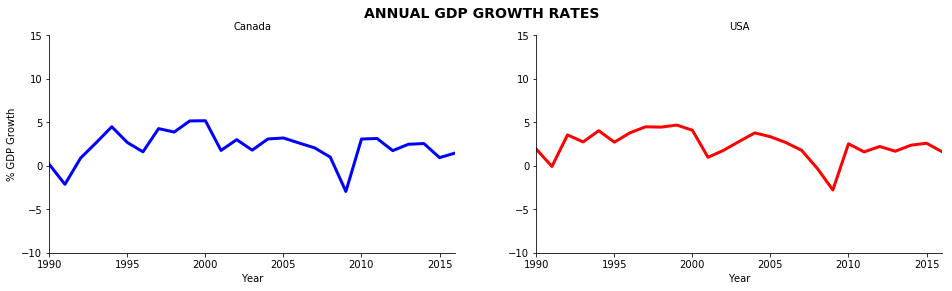

In [81]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, sharex = True, figsize = (16,4)) 


gdp['Canada'].plot(ax = ax[0], color = 'b', linewidth = 3.0) # Same idea, but specify that the first axes is for GDP
gdp['United States'].plot(ax = ax[1], color = 'r', linewidth = 3.0)

fig.suptitle("ANNUAL GDP GROWTH RATES", fontsize = 14, fontweight = "bold")

ax[0].set_title("Canada", fontsize = 10) # This stuff sets the title for each of the subplots...
ax[1].set_title("USA", fontsize = 10)

# The command above we needed to do element by element, but lets automate some other things...

for var in ax: # Think through what this is doing, for every instance of ax called var we will
    
    var.set_ylim(-10, 15)  # set the ylimits
    
    var.spines["right"].set_visible(False) # remove the top and right spines
    
    var.spines["top"].set_visible(False)
    
    var.set_xlabel("Year") # set the x label to year
    
   
ax[0].set_ylabel("% GDP Growth") # Lable the y axis (only once since its the same for both)

plt.show()

## <center>Section 5: Country Populations</center>


In [82]:
url5 = 'https://raw.githubusercontent.com/MichaelTtappous/Final_Project/master/Populations.csv'

pop = pd.read_csv(url5,              # We read the csv file and assign it to ref (for refugees)
                  skiprows=4,       # Skip the first 4 rows, which contain irrelevant data.
                  index_col=0)      # set the index as the first column, which are the country names

pop.head()

,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
Country Name,,,,,,,,,,,,,,,,,,,,,
Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,57715.0,...,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,NaN,NaN
Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,10152331.0,...,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,NaN,NaN
Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,6309770.0,...,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,NaN,NaN
Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,1914573.0,...,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,NaN,NaN
Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,19647.0,...,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,NaN,NaN


In [83]:
pop = pop.drop(useless_columns, axis = 1) # Here, we manipulate the data to drop some of the unnecessary columns.
# We can use the same columns as defined before because the source is the same (World Bank)

pop.head()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Country Name,,,,,,,,,,,,,,,,,,,,,
Aruba,62149.0,64622.0,68235.0,72504.0,76700.0,80324.0,83200.0,85451.0,87277.0,89005.0,...,101220.0,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0
Afghanistan,12249114.0,12993657.0,13981231.0,15095099.0,16172719.0,17099541.0,17822884.0,18381605.0,18863999.0,19403676.0,...,26616792.0,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0
Angola,12171441.0,12553446.0,12968345.0,13403734.0,13841301.0,14268994.0,14682284.0,15088981.0,15504318.0,15949766.0,...,20997687.0,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0
Albania,3286542.0,3266790.0,3247039.0,3227287.0,3207536.0,3187784.0,3168033.0,3148281.0,3128530.0,3108778.0,...,2970017.0,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0
Andorra,54509.0,56671.0,58888.0,60971.0,62677.0,63850.0,64360.0,64327.0,64142.0,64370.0,...,82683.0,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0


In [84]:
pop = pop.transpose() # Here we transpose the dataset so that the index is set by year

ref.index.name = 'Year' # Here we set the index name as the Year

pop = pop.dropna(axis=1,how='all')

pop.head(15)

Country Name,Aruba,Afghanistan,Angola,Albania,Andorra,Arab World,United Arab Emirates,Argentina,Armenia,American Samoa,...,Virgin Islands (U.S.),Vietnam,Vanuatu,World,Samoa,Kosovo,"Yemen, Rep.",South Africa,Zambia,Zimbabwe
1990,62149.0,12249114.0,12171441.0,3286542.0,54509.0,224735446.0,1860174.0,32729739.0,3538165.0,47038.0,...,103963.0,66016700.0,146634.0,5.284886e+09,162866.0,1862000.0,12057039.0,3.679349e+07,8027253.0,10183113.0
1991,64622.0,12993657.0,12553446.0,3266790.0,56671.0,230829868.0,1970026.0,33193918.0,3505251.0,48375.0,...,104807.0,67242400.0,150778.0,5.372078e+09,164076.0,1898000.0,12661614.0,3.769237e+07,8239732.0,10443043.0
1992,68235.0,13981231.0,12968345.0,3247039.0,58888.0,235037179.0,2086639.0,33655151.0,3442810.0,49593.0,...,105711.0,68450100.0,155243.0,5.456141e+09,165570.0,1932000.0,13325583.0,3.864679e+07,8452275.0,10682868.0
1993,72504.0,15095099.0,13403734.0,3227287.0,60971.0,241286091.0,2207405.0,34110917.0,3363098.0,50720.0,...,106577.0,69644500.0,159814.0,5.541076e+09,167207.0,1965000.0,14017239.0,3.961954e+07,8669168.0,10905756.0
1994,76700.0,16172719.0,13841301.0,3207536.0,62677.0,247435930.0,2328686.0,34558115.0,3283660.0,51803.0,...,107317.0,70824500.0,164208.0,5.624840e+09,168788.0,1997000.0,14692686.0,4.055850e+07,8896109.0,11116948.0
1995,80324.0,17099541.0,14268994.0,3187784.0,63850.0,255029671.0,2448820.0,34994814.0,3217342.0,52868.0,...,107817.0,71995500.0,168235.0,5.709757e+09,170157.0,2029000.0,15320653.0,4.142681e+07,9137077.0,11320346.0
1996,83200.0,17822884.0,14682284.0,3168033.0,64360.0,260843462.0,2571020.0,35419682.0,3168215.0,53929.0,...,108093.0,73156700.0,171801.0,5.792568e+09,171283.0,2059000.0,15889449.0,4.221022e+07,9394304.0,11518262.0
1997,85451.0,18381605.0,15088981.0,3148281.0,64327.0,266575075.0,2700010.0,35833969.0,3133086.0,54941.0,...,108355.0,74306900.0,174999.0,5.875398e+09,172198.0,2086000.0,16408954.0,4.292151e+07,9666578.0,11709997.0
1998,87277.0,18863999.0,15504318.0,3128530.0,64142.0,272235146.0,2838145.0,36241590.0,3108684.0,55901.0,...,108535.0,75456300.0,178078.0,5.957237e+09,172981.0,1966000.0,16896210.0,4.358403e+07,9950224.0,11893272.0
1999,89005.0,19403676.0,15949766.0,3108778.0,64370.0,277962869.0,2988162.0,36648068.0,3089017.0,56770.0,...,108596.0,76596700.0,181345.0,6.038067e+09,173755.0,1762000.0,17378098.0,4.423373e+07,10239714.0,12064537.0


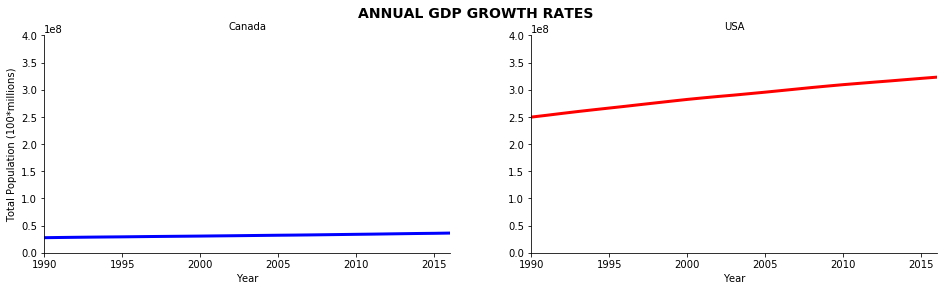

In [85]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, sharex = True, figsize = (16,4)) 


pop['Canada'].plot(ax = ax[0], color = 'b', linewidth = 3.0) # Same idea, but specify that the first axes is for GDP
pop['United States'].plot(ax = ax[1], color = 'r', linewidth = 3.0)

fig.suptitle("ANNUAL GDP GROWTH RATES", fontsize = 14, fontweight = "bold")

ax[0].set_title("Canada", fontsize = 10) # This stuff sets the title for each of the subplots...
ax[1].set_title("USA", fontsize = 10)

# The command above we needed to do element by element, but lets automate some other things...

for var in ax: # Think through what this is doing, for every instance of ax called var we will
    
    var.set_ylim(0, 400000000)  # set the ylimits
    
    var.spines["right"].set_visible(False) # remove the top and right spines
    
    var.spines["top"].set_visible(False)
    
    var.set_xlabel("Year") # set the x label to year
    
   
ax[0].set_ylabel("Total Population (100*millions)") # Lable the y axis (only once since its the same for both)

plt.show()

## <center>Section 6: Intentional Homicide Rates</center>


In [86]:
url6 = 'https://raw.githubusercontent.com/MichaelTtappous/Final_Project/master/Intentional%20Homicides.csv'

hom = pd.read_csv(url6)              # We read the csv file and assign it to ref (for refugees)
hom = hom.set_index('Year')
hom.head()

,Country or Area,Count,Rate,Source,Source Type
Year,,,,,
2008,Afghanistan,712,2.4,WHO,PH
2010,Albania,127,4.0,CTS/Transmonee,CJ
2009,Albania,85,2.7,CTS/Transmonee,CJ
2008,Albania,93,2.9,CTS/Transmonee,CJ
2007,Albania,105,3.3,CTS/Transmonee,CJ


In [87]:
useless_columns2 = ['Source', 'Source Type', 'Rate']

hom = hom.drop(useless_columns2, axis = 1) # Here, we manipulate the data to drop some of the unnecessary columns.
# We can use the same columns as defined before because the source is the same (World Bank)

hom.columns = ['Country', 'Homicide Count']

hom.head()

,Country,Homicide Count
Year,,
2008,Afghanistan,712
2010,Albania,127
2009,Albania,85
2008,Albania,93
2007,Albania,105


In [88]:
hom.shape
hom.dtypes

Country           object
Homicide Count     int64
dtype: object

In [89]:
hom = hom.groupby(['Year', 'Country']).sum()

# Here, we group first by year so that we have one row per year and then 
# we group by country so that there is one observation per country.
# The number of refugees by country is also summed per country, per year.

hom

Homicide Count
Year Country                                                         
1995 Albania                                                      210
     Anguilla                                                       1
     Argentina                                                   2723
     Armenia                                                      116
     Australia                                                    326
     Austria                                                       82
     Belarus                                                      960
     Bulgaria                                                     494
     Cambodia                                                     397
     Canada                                                       588
     Colombia                                                   25398
     Costa Rica                                                   184
     Croatia                                                      166
     Czech Republic                                               176
     Denmark                                                       60
     Dominican Republic                                          1007
     El Salvador                                                 7977
     Estonia                                                      246
     Finland                                                      146
     Georgia                                                      391
     Germany                                                     1372
     Greece                                                       151
     Greenland                                                     11
     Guatemala                                                   3260
     Guyana                                                       109
     Hungary                                                      296
     India                                                      42112
     Ireland                                                       43
     Israel                                                       112
     Italy                                                       1012
...                                                               ...
2010 Saint Vincent and the Grenadines                              25
     Serbia                                                       123
     Singapore                                                     19
     Slovenia                                                      15
     South Africa                                               15940
     Spain                                                        390
     Sri Lanka                                                    745
     Sweden                                                        91
     Switzerland                                                   52
     Syrian Arab Republic                                         463
     Tajikistan                                                   143
     Thailand                                                    3654
     The former Yugoslav Republic of Macedonia                     40
     Trinidad and Tobago                                          472
     Ukraine                                                     2356
     United States of America                                   12996
     Uruguay                                                      205
     Venezuela (Bolivarian Republic of)                         13080
2011 Bermuda                                                        8
     Dominican Republic                                          2513
     El Salvador                                                 4308
     Guatemala                                                   5681
     Honduras                                                    7104
     Hong Kong Special Administrative Region of China              17
     Israel                                                      

In [90]:
hom = hom.pivot_table(values='Homicide Count', index='Year', columns='Country')

# Here, we manipulate the data with a pivot table so that it matches the format
# of our Section 1 dataset and to allow us to represent the information graphically.

hom

Country,Afghanistan,Albania,Algeria,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,Australia,...,United States Virgin Islands,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Yemen,Zambia,Zimbabwe
Year,,,,,,,,,,,,,,,,,,,,,
1995,NaN,210.0,NaN,NaN,NaN,1.0,NaN,2723.0,116.0,326.0,...,NaN,NaN,NaN,1157.0,NaN,4481.0,NaN,NaN,NaN,NaN
1996,NaN,248.0,NaN,NaN,NaN,0.0,NaN,3001.0,114.0,312.0,...,NaN,NaN,NaN,1153.0,NaN,4961.0,NaN,NaN,NaN,NaN
1997,NaN,1542.0,NaN,NaN,NaN,1.0,NaN,3265.0,100.0,321.0,...,NaN,NaN,NaN,1054.0,NaN,4225.0,NaN,NaN,NaN,NaN
1998,NaN,573.0,NaN,NaN,NaN,0.0,NaN,2607.0,93.0,285.0,...,NaN,NaN,NaN,1065.0,NaN,4550.0,NaN,NaN,NaN,NaN
1999,NaN,496.0,NaN,NaN,NaN,0.0,NaN,2668.0,90.0,343.0,...,27.0,NaN,NaN,1014.0,NaN,5968.0,NaN,NaN,NaN,NaN
2000,NaN,275.0,NaN,NaN,NaN,1.0,5.0,2653.0,91.0,302.0,...,24.0,NaN,214.0,1068.0,NaN,8022.0,NaN,NaN,NaN,NaN
2001,NaN,208.0,NaN,NaN,NaN,0.0,7.0,3048.0,88.0,310.0,...,28.0,14061.0,218.0,1081.0,NaN,7960.0,NaN,NaN,NaN,NaN
2002,NaN,231.0,NaN,NaN,NaN,2.0,5.0,3453.0,69.0,318.0,...,41.0,14263.0,231.0,1058.0,NaN,9617.0,NaN,NaN,NaN,NaN
2003,NaN,144.0,NaN,NaN,NaN,2.0,5.0,2876.0,66.0,302.0,...,31.0,14465.0,197.0,963.0,NaN,11342.0,NaN,704.0,NaN,NaN


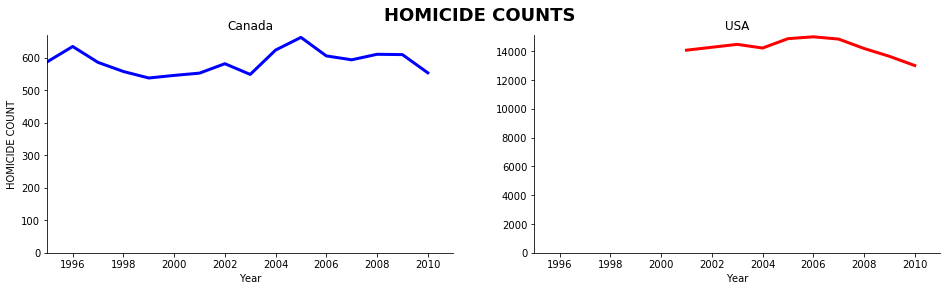

In [91]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, sharex = True, figsize = (16,4)) 


hom['Canada'].plot(ax = ax[0], color = 'b', linewidth = 3.0) # Same idea, but specify that the first axes is for GDP
hom['United States of America'].plot(ax = ax[1], color = 'r', linewidth = 3.0)

fig.suptitle("HOMICIDE COUNTS", fontsize = 18, fontweight = "bold")

ax[0].set_title("Canada", fontsize = 12) # This stuff sets the title for each of the subplots...
ax[1].set_title("USA", fontsize = 12)

# The command above we needed to do element by element, but lets automate some other things...

for var in ax: # Think through what this is doing, for every instance of ax called var we will
    
    var.set_ylim(0)  # set the ylimits
    
    var.spines["right"].set_visible(False) # remove the top and right spines
    
    var.spines["top"].set_visible(False)
    
    var.set_xlabel("Year") # set the x label to year
    
   
ax[0].set_ylabel("HOMICIDE COUNT") # Lable the y axis (only once since its the same for both)

plt.show()

In [99]:
hom['Canada']

Year
1995    588.0
1996    635.0
1997    586.0
1998    558.0
1999    538.0
2000    546.0
2001    553.0
2002    582.0
2003    549.0
2004    624.0
2005    663.0
2006    606.0
2007    594.0
2008    611.0
2009    610.0
2010    554.0
2011      NaN
Name: Canada, dtype: float64

## Part Three

In [102]:
dfCa = pd.DataFrame()  # IS THERE A FOR LOOP THAT CAN DO THIS FOR EVERY COUNTRY?

Ca = dfCa.append([ref.Canada])

Ca = Ca.transpose()

Ca.columns = ['Created']

Ca['Hosted'] = list(ref2.Canada)

Ca =Ca.fillna(0) # As we are missing data for some periods, we replace NaN with zero values

Ca['Net Refugees'] = Ca.Hosted - Ca.Created

Ca['% Unemployed'] = une.Canada

Ca['% GDP Growth'] = gdp.Canada

Ca['Population'] = pop.Canada

Ca['Refugees as % of Population'] = (Ca['Net Refugees']/Ca['Population'])*100

Ca['Homicide Counts'] = hom.Canada

Ca

Ca.head(30)

,Created,Hosted,Net Refugees,% Unemployed,% GDP Growth,Population,Refugees as % of Population,Homicide Counts
Year,,,,,,,,
1990,0.0,36084.0,36084.0,NaN,0.154346,27791000.0,0.129841,NaN
1991,4.0,26929.0,26925.0,10.300,-2.125692,28171682.0,0.095575,NaN
1992,4.0,15659.0,15655.0,11.200,0.882976,28519597.0,0.054892,NaN
1993,4.0,11785.0,11781.0,11.400,2.655236,28833410.0,0.040859,NaN
1994,4.0,10494.0,10490.0,10.400,4.493475,29111906.0,0.036033,NaN
1995,4.0,11457.0,11453.0,9.500,2.677708,29354000.0,0.039017,NaN
1996,8.0,10937.0,10929.0,9.600,1.611048,29671900.0,0.036833,NaN
1997,11.0,10370.0,10359.0,9.100,4.279812,29987200.0,0.034545,NaN
1998,15.0,9646.0,9631.0,8.300,3.881759,30247900.0,0.031840,NaN


In [109]:
dfUS = pd.DataFrame()

US = dfUS.append([ref['United States']])

US = US.transpose()

US.columns = ['Created']

US['Hosted'] = list(ref2['United States of America'])

US = US.fillna(0) # As we are missing data for some periods, we replace NaN with zero values

US['Net Refugees'] = US.Hosted - US.Created

US['% Unemployed'] = une['United States']

US['% GDP Growth'] = gdp['United States']

US['Population'] = pop['United States']

US['Refugees as % of Population'] = (US['Net Refugees']/US['Population'])*100

US['Homicide Counts'] = hom['United States of America']


US

US.head(30)

,Created,Hosted,Net Refugees,% Unemployed,% GDP Growth,Population,Refugees as % of Population,Homicide Counts
Year,,,,,,,,
1990,1.0,122276.0,122275.0,NaN,1.919370,249623000.0,0.048984,NaN
1991,8.0,112811.0,112803.0,6.800,-0.074085,252981000.0,0.044590,NaN
1992,10.0,132032.0,132022.0,7.500,3.555396,256514000.0,0.051468,NaN
1993,12.0,119483.0,119471.0,6.900,2.745857,259919000.0,0.045965,NaN
1994,366.0,112682.0,112316.0,6.100,4.037643,263126000.0,0.042685,NaN
1995,245.0,99490.0,99245.0,5.600,2.718976,266278000.0,0.037271,NaN
1996,143.0,75693.0,75550.0,5.400,3.795881,269394000.0,0.028044,NaN
1997,75.0,70085.0,70010.0,4.900,4.487026,272657000.0,0.025677,NaN
1998,51.0,76554.0,76503.0,4.500,4.449911,275854000.0,0.027733,NaN


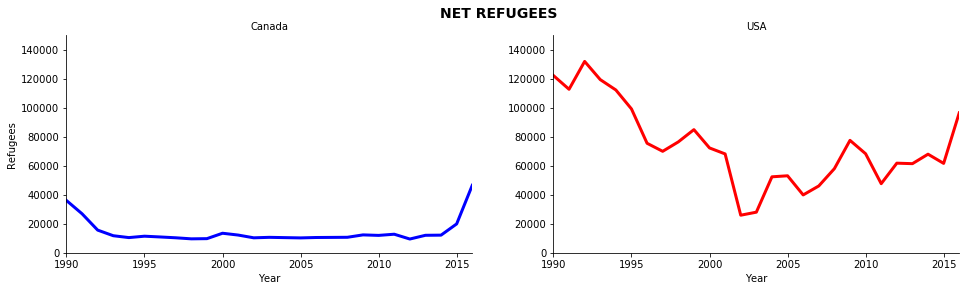

In [94]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, sharex = True, figsize = (16,4)) 


Ca['Net Refugees'].plot(ax = ax[0], color = 'b', linewidth = 3.0) # Same idea, but specify that the first axes is for GDP
US['Net Refugees'].plot(ax = ax[1], color = 'r', linewidth = 3.0)

fig.suptitle("NET REFUGEES", fontsize = 14, fontweight = "bold")

ax[0].set_title("Canada", fontsize = 10) # This stuff sets the title for each of the subplots...
ax[1].set_title("USA", fontsize = 10)

# The command above we needed to do element by element, but lets automate some other things...

for var in ax: # Think through what this is doing, for every instance of ax called var we will
    
    var.set_ylim(0, 150000)  # set the ylimits
    
    var.spines["right"].set_visible(False) # remove the top and right spines

    var.spines["top"].set_visible(False)
    
    var.set_xlabel("Year") # set the x label to year
    
   
ax[0].set_ylabel("Refugees") # Lable the y axis (only once since its the same for both)

plt.show()

In [95]:
dfUS = pd.DataFrame()

US = dfUS.append([ref['United States']])

US = US.transpose()

US.columns = ['Created']

US['Hosted'] = list(ref2['United States of America'])

US = US.fillna(0) # As we are missing data for some periods, we replace NaN with zero values

US['Net Refugees'] = US.Hosted - US.Created

US['% Unemployed'] = une['United States']

US['% GDP Growth'] = gdp['United States']

US['Population'] = pop['United States']

US['Refugees as % of Population'] = (US['Net Refugees']/US['Population'])*100

US

US.head(30)

,Created,Hosted,Net Refugees,% Unemployed,% GDP Growth,Population,Refugees as % of Population
Year,,,,,,,
1990,1.0,122276.0,122275.0,NaN,1.919370,249623000.0,0.048984
1991,8.0,112811.0,112803.0,6.800,-0.074085,252981000.0,0.044590
1992,10.0,132032.0,132022.0,7.500,3.555396,256514000.0,0.051468
1993,12.0,119483.0,119471.0,6.900,2.745857,259919000.0,0.045965
1994,366.0,112682.0,112316.0,6.100,4.037643,263126000.0,0.042685
1995,245.0,99490.0,99245.0,5.600,2.718976,266278000.0,0.037271
1996,143.0,75693.0,75550.0,5.400,3.795881,269394000.0,0.028044
1997,75.0,70085.0,70010.0,4.900,4.487026,272657000.0,0.025677
1998,51.0,76554.0,76503.0,4.500,4.449911,275854000.0,0.027733


In [96]:
CNTRY = list(ref2.columns)

CNTRY

['Argentina',
 'Australia',
 'Austria',
 'Belarus',
 'Belgium',
 'Benin',
 'Brazil',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Rep.',
 'Chile',
 'Czech Rep.',
 'Denmark',
 'Ecuador',
 'El Salvador',
 'Estonia',
 'Finland',
 'France',
 'Germany',
 'Guatemala',
 'Hungary',
 'Iceland',
 'Iran (Islamic Rep. of)',
 'Ireland',
 'Italy',
 'Japan',
 'Jordan',
 'Latvia',
 'Liechtenstein',
 'Lithuania',
 'Luxembourg',
 'Mexico',
 'Netherlands',
 'New Zealand',
 'Nicaragua',
 'Norway',
 'Paraguay',
 'Philippines',
 'Portugal',
 'Rep. of Korea',
 'Romania',
 'South Africa',
 'Spain',
 'Sweden',
 'Switzerland',
 'United Kingdom of Great Britain and Northern Ireland',
 'United States of America',
 'Uruguay',
 'Yemen']

In [97]:
for name in list(ref2.columns):
    
    count = 0
    
    name = pd.DataFrame()
    name = name.append(ref[ref.columns[count]])
    name = name.transpose()
    name.columns = ['Created']
    name['Hosted'] = list(ref2[ref2.columns[count]])
    name = name.fillna(0) # As we are missing data for some periods, we replace NaN with zero values
    name['Net Refugees'] = name.Hosted - name.Created
    name['% Unemployed'] = (une[une.columns[count]])
    name['% GDP Growth'] = (gdp[gdp.columns[count]])
    name['Population'] = (pop[pop.columns[count]])
    name['Refugees as % of Population'] = (name['Net Refugees']/name['Population'])*100
    
    
    count = count + 1
    break

In [98]:
Argentina

NameError: name 'Argentina' is not defined

In [ ]:
 name['Hosted'] = list(ref2[[count]])
    name = name.fillna(0) # As we are missing data for some periods, we replace NaN with zero values
    name['Net Refugees'] = name.Hosted - name.Created
    name['% Unemployed'] = une[[count]]
    name['% GDP Growth'] = gdp[[count]]
    name['Population'] = pop[[count]]
    name['Refugees as % of Population'] = (name['Net Refugees']/name['Population'])*100
    